In [19]:
from trainer import train
from evaluator import evaluate_all_runs
from visualizer import show_random_predictions
from converter import coco_to_yolo


## Prapere Labels

In [20]:


main_path = "/Volumes/L/L_PHAS0077/"
coco_json_path = main_path+"yolo/dental_radiography_yolo/valid/_valid_annotations.json"
images_dir = main_path+"yolo/dental_radiography_yolo/valid"      
output_dir = main_path+"yolo/dental_radiography_yolo/valid/labels"  

coco_to_yolo(coco_json_path, images_dir, output_dir)


Images processed : 121
Annotations total : 780
Labels location   : /Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/labels
Images location  : /Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/images


YOLOConversionStats(num_images=121, num_annotations=780, label_dir=PosixPath('/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/labels'), image_dir=PosixPath('/Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/images'))

## Train

In [14]:
# 1. fine-tune (adjust kwargs as needed)
train(epochs=1, batch=16)

100%|██████████| 18.4M/18.4M [00:00<00:00, 45.4MB/s]

[trainer] Starting training on /Volumes/L/L_PHAS0077/yolo/dental_data.yaml for 1 epochs …
New https://pypi.org/project/ultralytics/8.3.173 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.7.1 MPS (Apple M1 Max)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.5, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/Volumes/L/L_PHAS0077/yolo/dental_data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=True, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.2, mask_ratio=4, max_det=300, mixup=0.5, mode=train, model=yolo11s.pt, momentum=0.937, mo

  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  8                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1    990976  ultralytics.nn.modules.block.C2PSA           [512, 512, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None

train: Scanning /Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/train/labels.cache... 1075 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1075/1075 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 99.3±31.5 MB/s, size: 16.2 KB)



val: Scanning /Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/labels.cache... 121 images, 0 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<?, ?it/s]

Plotting labels to runs/detect/train/labels.jpg... 


optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      9.61G      1.498      1.772      1.165         98        640: 100%|██████████| 68/68 [06:11<00:00,  5.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:35<01:45, 35.11s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:50<00:46, 23.34s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [01:04<00:19, 19.43s/it]

WARNING ⚠️ NMS time limit 3.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:35<00:00, 23.88s/it]


                   all        121        780      0.295     0.0832     0.0901     0.0594

1 epochs completed in 0.131 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.7.1 MPS (Apple M1 Max)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:38<01:54, 38.28s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:47<00:42, 21.07s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:53<00:14, 14.42s/it]

WARNING ⚠️ NMS time limit 3.250s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:27<00:00, 21.94s/it]


                   all        121        780      0.362     0.0678     0.0772     0.0513
                Cavity         23         43          0          0   0.000386    0.00027
               Implant         59        159      0.775     0.0755      0.142     0.0967
              Fillings         97        540       0.28      0.117      0.104     0.0635
        Impacted Tooth         25         38      0.393     0.0789     0.0626     0.0449
Speed: 0.2ms preprocess, 499.7ms inference, 0.0ms loss, 148.9ms postprocess per image
Results saved to runs/detect/train
[trainer] Done ✅


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_runnin

## Evaluate All Runs

In [13]:
import os
from pathlib import Path          # ← CHANGE THIS LINE

ROOT: Path = Path(os.getenv("YOLO_PROJECT_ROOT", "/Volumes/L/L_PHAS0077")).expanduser()

RUNS_DIR = ROOT / "yolo" / "model_training" / "runs" / "detect"

metrics = evaluate_all_runs(runs_dir=RUNS_DIR,
                            output_csv="validation_summary.csv")


[evaluator] Evaluating train2 …
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.7.1 MPS (Apple M1 Max)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 92.4±17.1 MB/s, size: 15.3 KB)


val: Scanning /Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/labels.cache... 121 images, 0 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]


                   all        121        780      0.785      0.836      0.812      0.547
                Cavity         23         43      0.544      0.628      0.528      0.305
               Implant         59        159      0.957      0.969      0.971      0.667
              Fillings         97        540      0.838      0.893      0.915      0.608
        Impacted Tooth         25         38      0.803      0.857      0.835      0.609
Speed: 2.2ms preprocess, 10.4ms inference, 0.0ms loss, 20.5ms postprocess per image
Results saved to runs/detect/val5
[evaluator] Evaluating train3 …
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.7.1 MPS (Apple M1 Max)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 77.3±15.1 MB/s, size: 15.4 KB)


val: Scanning /Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/labels.cache... 121 images, 0 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]


                   all        121        780        0.8       0.73      0.803      0.553
                Cavity         23         43      0.622      0.421      0.517      0.313
               Implant         59        159      0.932       0.95      0.976      0.693
              Fillings         97        540      0.878      0.837      0.924      0.629
        Impacted Tooth         25         38      0.766      0.711      0.795      0.578
Speed: 1.5ms preprocess, 18.7ms inference, 0.0ms loss, 22.8ms postprocess per image
Results saved to runs/detect/val6
[evaluator] Evaluating train10 …
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.7.1 MPS (Apple M1 Max)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 82.3±18.5 MB/s, size: 16.7 KB)


val: Scanning /Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/valid/labels.cache... 121 images, 0 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]


                   all        121        780      0.686      0.829      0.788      0.535
                Cavity         23         43      0.395      0.581      0.403      0.217
               Implant         59        159        0.9      0.981      0.981       0.67
              Fillings         97        540      0.777      0.911      0.907      0.617
        Impacted Tooth         25         38      0.671      0.842      0.861      0.635
Speed: 0.8ms preprocess, 10.5ms inference, 0.0ms loss, 20.0ms postprocess per image
Results saved to runs/detect/val7
[evaluator] Skipping val: no best.pt
[evaluator] Skipping val2: no best.pt
[evaluator] Skipping val3: no best.pt
[evaluator] Skipping val4: no best.pt
[evaluator] Saved → validation_summary.csv


## Predictions


image 1/1 /Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/test/images/0762_jpg.rf.65fd543f0d87cc9d38dc1968abb4d2c7.jpg: 320x640 8 Implants, 6 Fillingss, 58.2ms
Speed: 1.2ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 640)


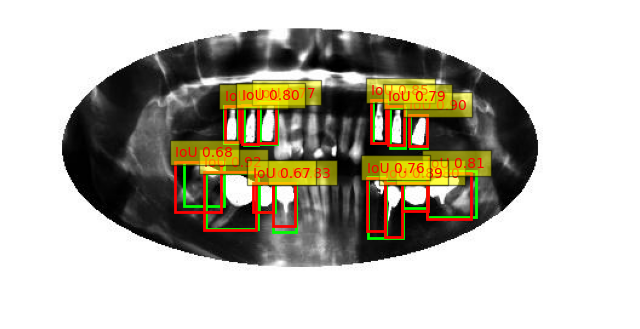


image 1/1 /Volumes/L/L_PHAS0077/yolo/dental_radiography_yolo/test/images/0081_jpg.rf.b8e53bd80056c633065450a6800872b2.jpg: 320x640 1 Cavity, 52.7ms
Speed: 0.9ms preprocess, 52.7ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 640)


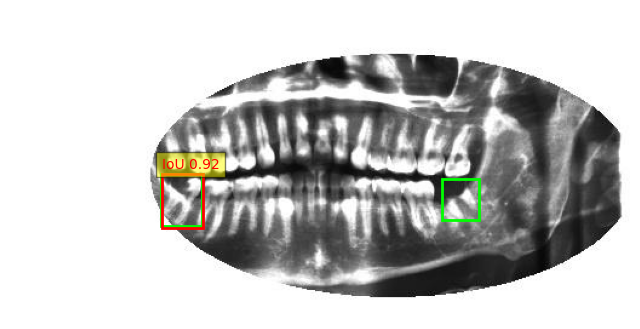

In [5]:

# 3. visual check on 10 random test images
show_random_predictions(
    model_path="./runs/detect/train2/weights/best.pt",
    conf_thres=0.5,
    iou_threshold=0.5,
    num_images=2,
)
